In [1]:
from scipy.interpolate import interp1d, CubicSpline, lagrange
import matplotlib.pyplot as plt
#%matplotlib
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

plt.style.use('seaborn-poster')

In [2]:
x = [0, 1, 2]
y = [1, 3, 2]

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)
print(f)

2.5


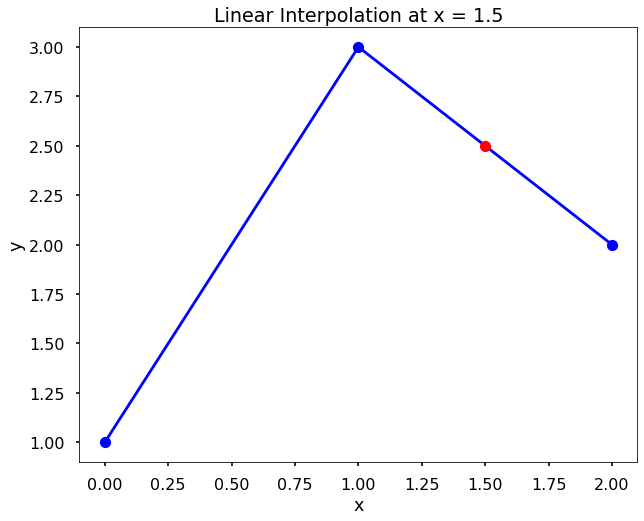

In [3]:
plt.ioff()
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

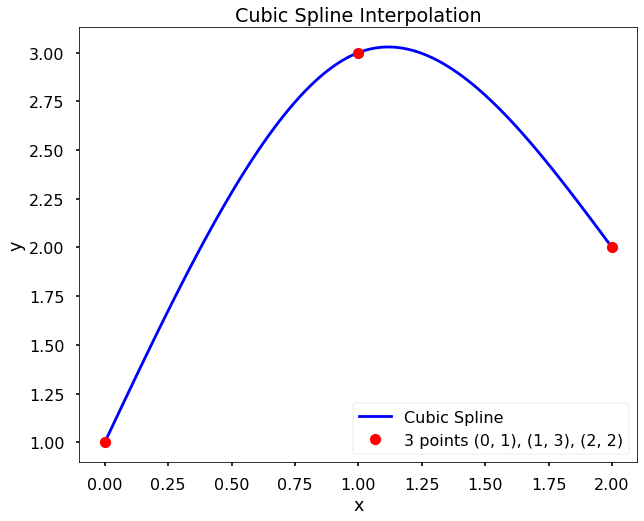

In [7]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b', label="Cubic Spline")
plt.plot(x, y, 'ro', label="3 points (0, 1), (1, 3), (2, 2)")
plt.title(f'Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [8]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1,  0,  0,  0, 0],
              [0, 0, 0, 0,  1,  1,  1, 1],
              [1, 1, 1, 1,  0,  0,  0, 0], 
              [0, 0, 0, 0,  8,  4,  2, 1],
              [3, 2, 1, 0, -3, -2, -1, 0],
              [6, 2, 0, 0, -6, -2,  0, 0],
              [0, 2, 0, 0,  0,  0,  0, 0],
              [0, 0, 0, 0, 12,  2,  0, 0]])
np.dot(np.linalg.inv(A), b)
# [0, 2, 0, 0,  0,  0,  0, 0][0, 0, 0, 0, 12,  2,  1, 0]

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

In [9]:
x = 1.5
y2 = 0.75*x**3 - 4.5*x**2 + 7.25*x - 0.5
print(y2)
y20 = 0.09090909*x**3 - 0.54545455*x**2 + 3.45454545
print(y20)

2.78125
2.53409089125


In [10]:
"""For the data set x = [0, 1, 2] and y = [1, 3, 2]. 
Plot each polynomial and verify the property that Pi(xj)=1 when i=j and Pi(xj)=0 when i≠j.

P1(x) = ((x−x2)(x−x3))/((x1−x2)(x1−x3)) = ((x−1)(x−2))/((0−1)(0−2)) = 1/2*(x^2 − 3x + 2),
P2(x) = ((x−x1)(x−x3))/((x2−x1)(x2−x3)) = ((x−0)(x−2))/((1−0)(1−2)) = −x^2 + 2x,
P3(x) = ((x−x1)(x−x2))/((x3−x1)(x3−x2)) = ((x−0)(x−1))/((2−0)(2−1)) = 1/2*(x^2 − x)."""
# From P1, P2, P3
# c, bx, ax^2
#   [c,   b,  a ]
#P1 [1,-1.5, 0.5]
#P2 [0,   2,  -1]
#P3 [0,-0.5, 0.5]

x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

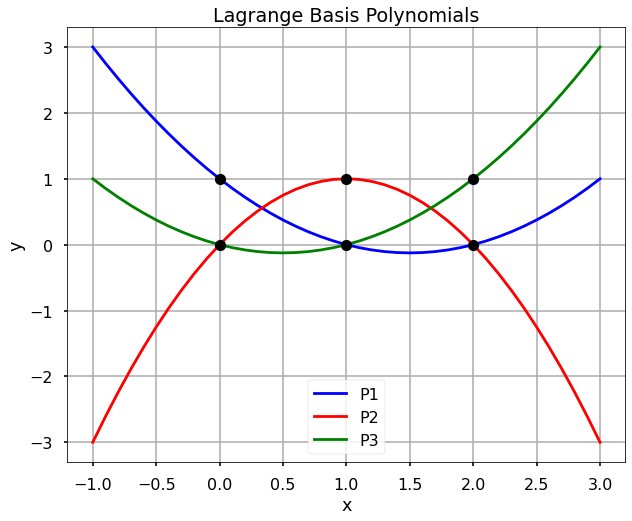

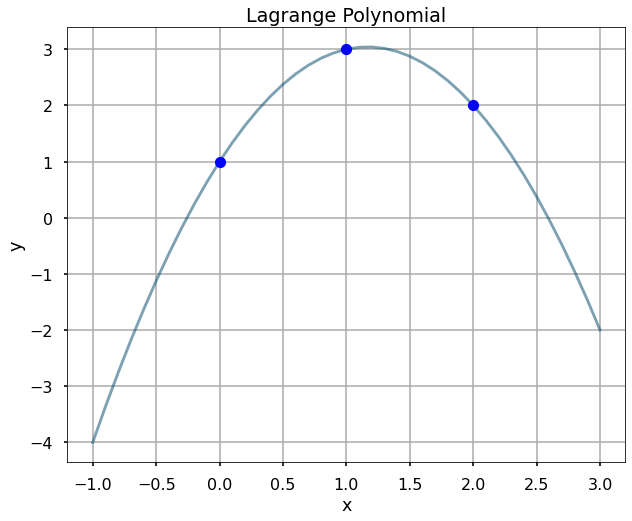

In [11]:
L = P1 + 3*P2 + 2*P3

y_new = -1.5*x_new**2 + 3.5*x_new + 1

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', alpha=0.3)
plt.plot(x_new, y_new, 'g', alpha=0.3)
plt.plot(x, y, 'bo')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

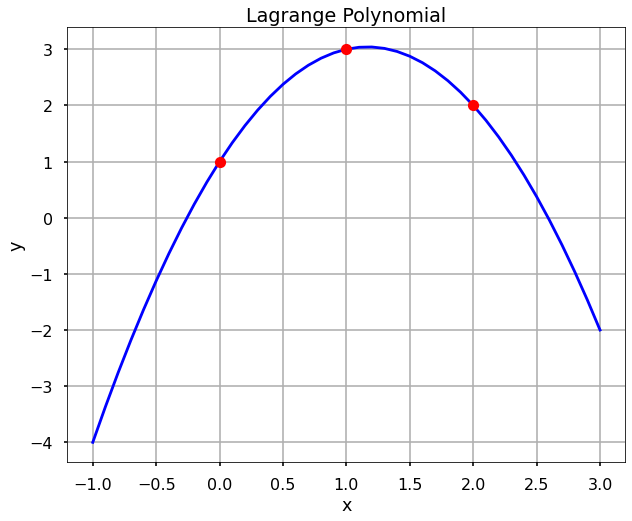

In [12]:
f = lagrange(x, y)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
a = np.zeros(4)
a

array([0., 0., 0., 0.])

[ 2.         -1.4         0.48571429  0.        ]


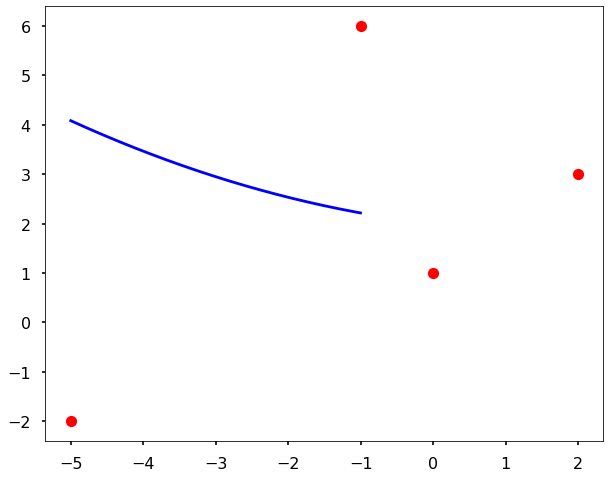

In [15]:
x = np.array([-5, -1, 0, 2])
y = [-2, 6, 1, 3]
m = len(x)
n = len(x) - 1  # deg of poly



a[0] = (y[1] - y[0])/(x[1] - x[0])
a[1] = ((y[2] - y[1])/(x[2] - x[1]) - (y[1] - y[0])/(x[1] - x[0]))/(x[2] - x[0])
a[2] = ((((y[3] - y[2])/(x[3] - x[2]) - (y[2] - y[1])/(x[2] - x[1]))/(x[3] - x[1]))
        - (((y[2] - y[1])/(x[2] - x[1]) - (y[1] - y[0])/(x[1] - x[0]))/(x[2]-x[0])))/(x[3] - x[0])

print(a)

x_new = np.arange(-5, -1, 0.002)
#y_new = c[0]*x_new**3 + c[1]*x_new**2 + c[2]*x_new + c[3]
y_new = 0.05*x_new**2 - 0.1667*x_new + 2 

fig = plt.figure(figsize = (10,8))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new, 'b')
plt.show()

In [16]:
v = np.copy(y)
print(np.copy(y))
print(np.array([8, 3, 5])/np.array([4, 5, 7]))
v[2:4] = np.array([3, 5])/np.array([5, 7])
v

[-2  6  1  3]
[2.         0.6        0.71428571]


array([-2,  6,  0,  0])

In [ ]:
n

In [20]:
# Python3 program for implementing
# Newton divided difference formula

# Function to find the product term
def proterm(i, value, x):
    pro = 1;
    for j in range(i):
        pro = pro * (value - x[j]);
    return pro;

# Function for calculating
# divided difference table
# does the same thing as the one below from in the book example
def dividedDiffTable(x, y, n):

    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) / (x[j] - x[i + j]))
            print(y[j][i])
    return y;

# Function for applying Newton's
# divided difference formula
def applyFormula(value, x, y, n):

    sum = y[0][0];

    for i in range(1, n):
        sum = sum + (proterm(i, value, x) * y[0][i]);

    return sum;

# Function for displaying divided
# difference table
def printDiffTable(y, n):

    for i in range(n):
        for j in range(n - i):
            print(round(y[i][j], 4), "\t",end = " ");
            print("");

# Driver Code

# number of inputs given
x = [ -5, -1, 0, 2]
n = len(x);
y = [[0 for i in range(n)]
        for j in range(n)]


# y[][] is used for divided difference
# table where y[][0] is used for input
# y values that are in the data
y[0][0] = -2;
y[1][0] = 6;
y[2][0] = 1;
y[3][0] = 3;

# calculating divided difference table
y=dividedDiffTable(x, y, n);

# displaying divided difference table
printDiffTable(y, n);

# value to be interpolated
value = np.linspace(0, 4, 25);

# printing the value
print(f"\nValue at {value} is {applyFormula(value, x, y, n)}")

# This code is contributed by mits
# https://www.geeksforgeeks.org/newtons-divided-difference-interpolation-formula/




2.0
-5.0
1.0
-1.4
2.0
0.4857142857142857
-2 	 
2.0 	 
-1.4 	 
0.4857 	 
6 	 
-5.0 	 
2.0 	 
1 	 
1.0 	 
3 	 

Value at [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.         2.16666667 2.33333333 2.5        2.66666667 2.83333333
 3.         3.16666667 3.33333333 3.5        3.66666667 3.83333333
 4.        ] is [ 1.          0.38240741 -0.13756614 -0.54642857 -0.83068783 -0.97685185
 -0.97142857 -0.80092593 -0.45185185  0.08928571  0.83597884  1.80171958
  3.          4.44431217  6.14814815  8.125      10.38835979 12.95171958
 15.82857143 19.03240741 22.57671958 26.475      30.74074074 35.38743386
 40.42857143]


In [ ]:
y

In [ ]:
print("Two differnt ways to generate the coefficients and on to generate new y values")

def _poly_newton_coefficient(x, y):
    """
    x: list or np array contanining x data points
    y: list or np array contanining y data points
    """

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    c = 1
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def coef(x, y):
    '''x : array of data points
       y : array of f(x)  '''
    # x.astype(float)
    # y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])

    for j in range(1, n):

        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a) # return an array of coefficient

def newton_polynomial(x_data, y_data, x):
    """
    x_data: data points at x
    y_data: data points at y
    x: evaluation point(s)
    """
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  # Degree of polynomial
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

#c = coef(x, y)
#a = _poly_newton_coefficient(x, y)
#point = 1.5
#poly = newton_polynomial(x, y, point)

From book


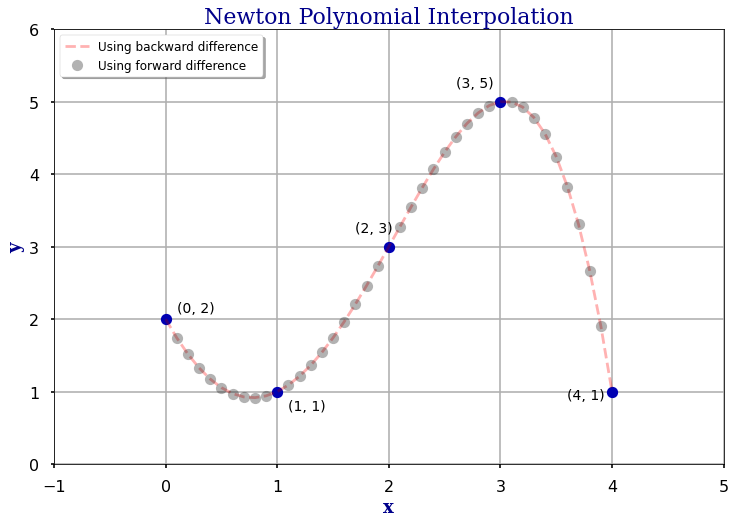

In [33]:
print("From book")


def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)  # Total number of values
    # Create a matrix of zeros size of n (4 x 4)
    # to write new values into.
    coef = np.zeros([n, n])
   
    # The first column is the y data values ([-2, 6, 1, 3])
    coef[:,0] = y

    # Create the divided differences table, coef table.
    # Based on f[x(k),x(k-1)...,x1, x0] = 
    # (f[xk,xk-1...x2,x2] - f[x(k-1), x(k-2)...,x1,x0])/(x(k) - x0)
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j]-x[i])

    return coef


def newt_div_diff(x, y):
    '''x : array of data points
       y : array of f(x)  '''
    # x.astype(float)
    # y.astype(float)
    n = len(x)
    c = []
    for i in range(n):
        c.append(y[i])

    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            c[i] = float(c[i]-c[i-1])/float(x[i]-x[i-j])

    return np.array(c) # return an array of coefficient


def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    The coef is returned from divided_diff(x, y);
    The x_data is the actual x data array;
    The x is a series of numbers from 
    minimum x value (-5) to maximum x value (2)
    in small segments (0.1). This creates a 
    new series of y values to plot through the points.
    '''
    n = len(x_data) - 1 
    p = coef[n]
    
    for k in range(1,n+1):
        p = coef[n - k] + (x - x_data[n - k])*p
       
    return p
# Arrays for x and y 
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])


# get the divided difference coef
a_s = divided_diff(x, y)[0, :] 
coff = newt_div_diff(x, y)

# evaluate on new data points
x_new = np.arange(0, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)
dif_y = newton_poly(coff, x, x_new)

# font dictonary
font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 22,
        }

font2 = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 18,
        }

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, dif_y, 'r--', alpha=0.3, label='Using backward difference')
plt.plot(x_new, y_new, 'ko', alpha=0.3, label='Using forward difference')
plt.title('Newton Polynomial Interpolation', fontdict=font)
plt.annotate('(0, 2)', xy=(0, 2), xytext=(0.1, 2.1), fontsize=14)
plt.annotate('(1, 1)', xy=(1, 1), xytext=(1.1, .75), fontsize=14)
plt.annotate('(2, 3)', xy=(2, 3), xytext=(1.7, 3.2), fontsize=14)
plt.annotate('(3, 5)', xy=(3, 5), xytext=(2.6, 5.2), fontsize=14)
plt.annotate('(4, 1)', xy=(4, 1), xytext=(3.6, .9), fontsize=14)
plt.grid()
plt.xlim(-1, 5)
plt.ylim(0, 6)
plt.xlabel('x', fontdict=font2)
plt.ylabel('y', fontdict=font2)
legend = plt.legend(loc='upper left', shadow=True, fontsize=12, fancybox=True)
plt.show()

In [27]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])


def my_cubic_spline(x, y, X):
    n = len(x)
    cx = int(len(X)/(n - 1)) # for four points
    num_equ = 4 * (n - 1)
    """ 
    Create the vectors from the spline equations.
    There is a better way to do this using a Jacobi Matrix 
    or a Chech matrix.
    None of those are coved in this book, not much of anthing
    concerning development of a interpolation outside of linear
    is covered. I tried to use a loop to write this and had issues
    with derivatives S'(xi=1) and S''(xi+1), including the end
    conditions.
    """
    # Constraints Si(xi) = y(i)
    m1 = [x[0]**3, x[0]**2, x[0], 1, 0, 0, 0, 0, 0, 0, 0, 0]
    m2 = [0, 0, 0, 0, x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0]
    m3 = [0, 0, 0, 0, 0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1]
    # Constraints Si(xi+1) = y(i+1)
    m4 = [x[1]**3, x[1]**2, x[1], 1, 0, 0, 0, 0, 0, 0, 0, 0]
    m5 = [0, 0, 0, 0, x[2]**3, x[2]**2, x[2], 1, 0, 0, 0, 0]
    m6 = [0, 0, 0, 0, 0, 0, 0, 0, x[3]**3, x[3]**2, x[3], 1]
    # First derivative S'(xi+1) = S'i+1(xi+1)
    m7 = [3*x[1]**2, 2*x[1], 1, 0, -3*x[1]**2, -2*x[1], -1, 0, 0, 0, 0, 0]
    m8 = [0, 0, 0, 0, 3*x[2]**2, 2*x[2], 1, 0, -3*x[2]**2, -2*x[2], -1, 0]
    m9 = [6*x[0], 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Endpoint Conditions
    # Second derivative S''(xi+1) = S''i+1(xi+1)
    m10 = [6*x[1], 2, 0, 0, -6*x[1], -2, 0, 0, 0, 0, 0, 0]
    m11 = [0, 0, 0, 0, 6*x[2], 2, 0, 0, -6*x[2], -2, 0, 0]
    m12 = [0, 0, 0, 0, 0, 0, 0, 0, 6*x[3], 2, 0, 0]
    m = [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12]
    
    # Create an empty matrix annd assign values to each point.
    M = np.zeros((num_equ, num_equ))
    for i in range(len(m)):
        M[i, :] = m[i]
    #M[0, :] = m1
    #M[1, :] = m2 
    #M[2, :] = m3
    #M[3, :] = m4
    #M[4, :] = m5
    #M[5, :] = m6
    #M[6, :] = m7
    #M[7, :] = m8
    #M[8, :] = m9
    #M[9, :] = m10
    #M[10, :] = m11
    #M[11, :] = m12
    
    # This is the Y vector Ax=Y
    Y = [y[0], y[1], y[2], y[1], y[2], y[3], 0, 0, 0, 0, 0, 0]
    
    # Solve the sytem of equations
    coef = np.dot(np.linalg.inv(M), Y)
    
    # Create the ranges for x values
    x_sp1 = np.linspace(0, 1, cx)
    x_sp2 = np.linspace(1, 2, cx)
    x_sp3 = np.linspace(2, 3, cx)
    
    # The equations for interpolated y value between nodes
    y_sp3 = coef[8]*x_sp3**3 + coef[9]*x_sp3**2 +  coef[10]*x_sp3 + coef[11]
    y_sp2 = coef[4]*x_sp2**3 + coef[5]*x_sp2**2 +  coef[6]*x_sp2 + coef[7]
    y_sp1 = coef[0]*x_sp1**3 + coef[1]*x_sp1**2 +  coef[2]*x_sp1 + coef[3]

    # Put them all togather
    Y = np.concatenate((y_sp1, y_sp2, y_sp3))

    return Y


x = [0, 1, 2, 3]
y = [1, 3, 2, 1]
x_sp = np.linspace(0, 3, 150)
y_sp = my_cubic_spline(x, y, x_sp)

fig = plt.figure(figsize = (10,8))
plt.plot(x, y, 'ro')
plt.plot(x_sp, y_sp, 'g')
plt.show()


In [ ]:
y

In [26]:

def jacobi(A, b, x0, tol, n_iterations=300):
    """
    Performs Jacobi iterations to solve the line system of
    equations, Ax=b, starting from an initial guess, ``x0``.
    
    Returns:
    x, the estimated solution
    """
    
    n = A.shape[0]
    x = x0.copy()
    x_prev = x0.copy()
    counter = 0
    x_diff = tol+1
    
    while (x_diff > tol) and (counter < n_iterations): #iteration level
        for i in range(0, n): #element wise level for x
            s = 0
            for j in range(0,n): #summation for i !=j
                if i != j:
                    s += A[i,j] * x_prev[j] 
            
            x[i] = (b[i] - s) / A[i,i]
        print(A)
        #update values
        counter += 1
        x_diff = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() #use new x for next iteration
        
    
    print("Number of Iterations: ", counter)
    print("Norm of Difference: ", x_diff)
    return x

def cubic_spline(x, y, tol = 1e-100):
    """
    Interpolate using natural cubic splines.
    
    Generates a strictly diagonal dominant matrix then applies Jacobi's method.
    
    Returns coefficients:
    b, coefficient of x of degree 1
    c, coefficient of x of degree 2
    d, coefficient of x of degree 3
    """ 
    x = np.array(x)
    y = np.array(y)
    ### check if sorted
    if np.any(np.diff(x) < 0):
        idx = np.argsort(x)
        x = x[idx]
        y = y[idx]

    size = len(x)
    delta_x = np.diff(x)
    delta_y = np.diff(y)
    
    ### Get matrix A
    A = np.zeros(shape = (size,size))
    b = np.zeros(shape=(size,1))
    A[0,0] = 1
    A[-1,-1] = 1
    
    for i in range(1,size-1):
        A[i, i-1] = delta_x[i-1]
        A[i, i+1] = delta_x[i]
        A[i,i] = 2*(delta_x[i-1]+delta_x[i])
        print(A)
    ### Get matrix b
        b[i,0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])
        print(b)
    ### Solves for c in Ac = b
    print('Jacobi Method Output:')
    c = jacobi(A, b, np.ones(len(A)), tol = tol, n_iterations=1000)
    print(c)
    ### Solves for d and b
    d = np.zeros(shape = (size-1,1))
    b = np.zeros(shape = (size-1,1))
    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
    
    return b, c, d

x = [0, 1, 2]
y = [1, 3, 2]

b1, c2, d3 = cubic_spline(x, y)
print(b1, c2, d3)

[[1. 0. 0.]
 [1. 4. 1.]
 [0. 0. 1.]]
[[ 0.]
 [-9.]
 [ 0.]]
Jacobi Method Output:
[[1. 0. 0.]
 [1. 4. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 4. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 4. 1.]
 [0. 0. 1.]]
Number of Iterations:  3
Norm of Difference:  0.0
[ 0.   -2.25  0.  ]
[[2.75]
 [0.5 ]] [ 0.   -2.25  0.  ] [[-0.75]
 [ 0.75]]


In [74]:
for i in range(0,12,3):
  print(i)

0
3
6
9


In [30]:
print(coef[0:4], coef[4:8])
print(d3[1], c2[2], b1[1], y[2])

[-0.75  0.    2.75  1.  ] [ 0.75 -4.5   7.25 -0.5 ]
0.75 0.0 0.5 2
